<a href="https://colab.research.google.com/github/valentinabitonte/Esercizi/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('loan.csv', index_col= 'Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.replace({'Gender':{'Male':0,'Female':1}, 'Married':{'Yes':0,'No':1}, 'Dependents':{'3+':3}, 'Education':{'Graduate':0,'Not Graduate':1}, 'Self_Employed':{'Yes':0, 'No':1}, 'Property_Area':{'Urban':0, 'Rural':1, 'Semiurban':2}, 'Loan_Status':{'Y':0,'N':1}}, inplace=True)

Gender    male --> 0
        female --> 1

Married   Yes --> 0
           No --> 1

dependents  3+ --> 3

Education  Graduate --> 0
       Not Graduate --> 1
       
Self_Employed  Yes --> 0
                 No --> 1 
            
Property_Area  Urban --> 0
                Rural --> 1
                Semiurban --> 2
      
Loan_Status   Y --> 0
              N --> 1



In [9]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.0,1.0,0,0,1.0,5849,0.0,NaN,360.0,1.0,0,0
LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,1,1
LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,0,0
LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,0,0
LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1.0,1.0,0,0,1.0,2900,0.0,71.0,360.0,1.0,1,0
LP002979,0.0,0.0,3,0,1.0,4106,0.0,40.0,180.0,1.0,1,0
LP002983,0.0,0.0,1,0,1.0,8072,240.0,253.0,360.0,1.0,0,0


In [18]:
df = df.fillna(df.median())

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,0.0,1.0,0,0,1.0,5849,0.0,128.0,360.0,1.0,0,0
LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,1,1
LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,0,0
LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,0,0
LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1.0,1.0,0,0,1.0,2900,0.0,71.0,360.0,1.0,1,0
LP002979,0.0,0.0,3,0,1.0,4106,0.0,40.0,180.0,1.0,1,0
LP002983,0.0,0.0,1,0,1.0,8072,240.0,253.0,360.0,1.0,0,0


In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Separo il df in features e target

In [21]:
X_ = df.iloc[:,0:-1] #prendo tutte le righe dalla prima alla penultima
y = df.iloc[:,-1]# prendo tulle le righe dell'ultima colonna
X_

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,0.0,1.0,0,0,1.0,5849,0.0,128.0,360.0,1.0,0
LP001003,0.0,0.0,1,0,1.0,4583,1508.0,128.0,360.0,1.0,1
LP001005,0.0,0.0,0,0,0.0,3000,0.0,66.0,360.0,1.0,0
LP001006,0.0,0.0,0,1,1.0,2583,2358.0,120.0,360.0,1.0,0
LP001008,0.0,1.0,0,0,1.0,6000,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1.0,1.0,0,0,1.0,2900,0.0,71.0,360.0,1.0,1
LP002979,0.0,0.0,3,0,1.0,4106,0.0,40.0,180.0,1.0,1
LP002983,0.0,0.0,1,0,1.0,8072,240.0,253.0,360.0,1.0,0


In [22]:
y

Loan_ID
LP001002    0
LP001003    1
LP001005    0
LP001006    0
LP001008    0
           ..
LP002978    0
LP002979    0
LP002983    0
LP002984    0
LP002990    1
Name: Loan_Status, Length: 614, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [25]:
X_test.shape

(185, 11)

DECISION TREES CLASSIFIER

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.745945945945946

RANDOM FOREST CLASSIFIER

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7351351351351352

LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.8054054054054054

K-NEAREST NEIGHBOR 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)


0.7405405405405405

CONFUSION MATRIX DI OGNI METODO DI CLASSIFICAZIONE

In [30]:
classifiers = [DecisionTreeClassifier(max_depth=4), 
               RandomForestClassifier(n_estimators=200),
               LogisticRegression(max_iter=1000),
               KNeighborsClassifier(n_neighbors=2)
               ]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

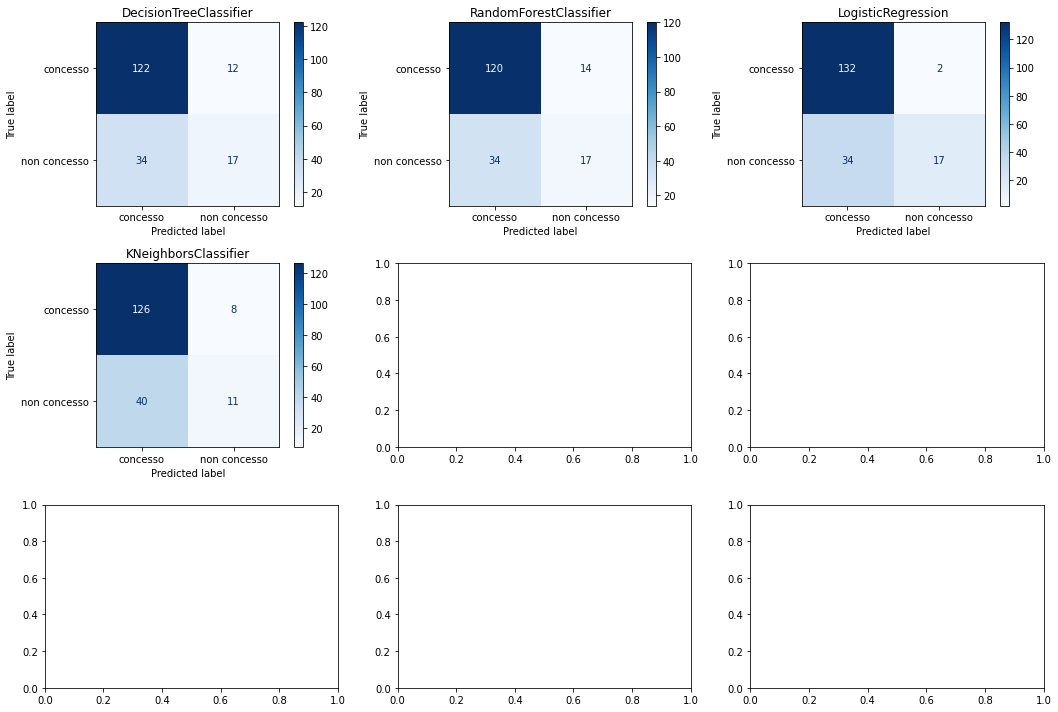

In [32]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['concesso','non concesso'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  

In [33]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       134
           1       0.59      0.33      0.42        51

    accuracy                           0.75       185
   macro avg       0.68      0.62      0.63       185
weighted avg       0.73      0.75      0.73       185

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       134
           1       0.55      0.33      0.41        51

    accuracy                           0.74       185
   macro avg       0.66      0.61      0.62       185
weighted avg       0.72      0.74      0.72       185

LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       134
           1       0.89      0.33      0.49        51

    accuracy                           0.81       185
   macro avg     

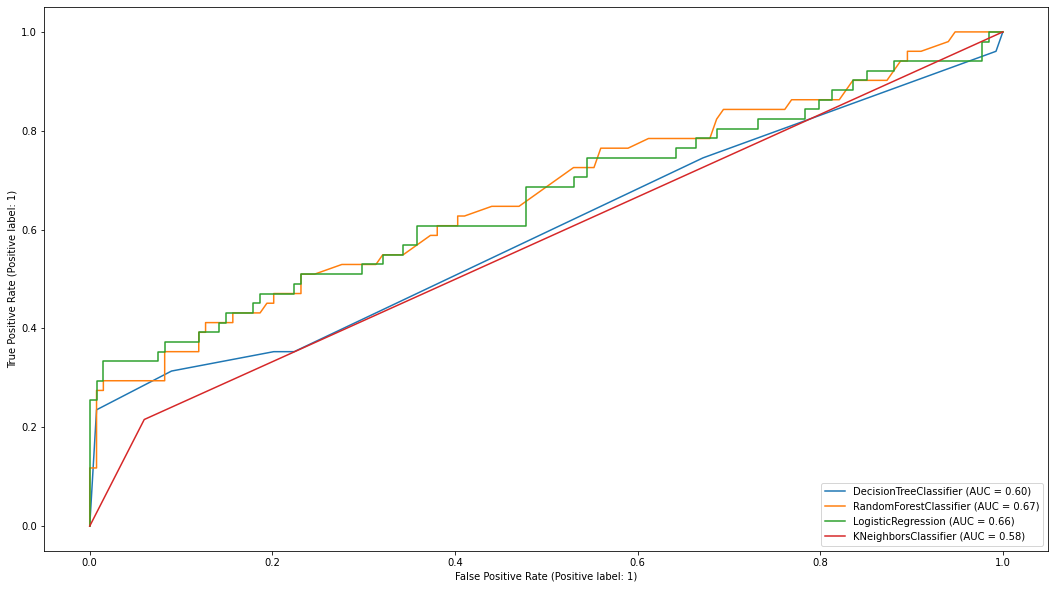

In [34]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

CROSS VALIDATION

In [40]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [35]:
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()


In [41]:
# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models performance metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()]},
                                  
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    #models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table.T)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.806346,0.901270,0.428158,0.576460
Decision Tree,0.703702,0.526893,0.548421,0.533767
Random Forest,0.780222,0.762362,0.443947,0.553042


In [44]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = LogisticRegression(max_iter=10000)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    f1 = f1_score(y_test, test_y_pred,average='macro')
    featu.append(f1)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, F1: %.3f' % (i, test_acc, f1 ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.800, F1: 0.670
feature selected 3, Acc.Test: 0.795, F1: 0.658
feature selected 4, Acc.Test: 0.805, F1: 0.683
feature selected 5, Acc.Test: 0.800, F1: 0.670
feature selected 6, Acc.Test: 0.805, F1: 0.683
feature selected 7, Acc.Test: 0.805, F1: 0.683
feature selected 8, Acc.Test: 0.805, F1: 0.683
feature selected 9, Acc.Test: 0.805, F1: 0.683
feature selected 10, Acc.Test: 0.805, F1: 0.683

 Best number of feature selection is: 4


PIPELINE FINALE

In [46]:
classifier = LogisticRegression(max_iter=10000)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                #('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [47]:
input_data = [1,0,3,0,0,5900,0,60,360,1,0]

prediction = pipe.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==0):
  print('Mutuo Concesso')
else:
  print('Mutuo non concesso')

0
Mutuo Concesso
